In [1]:
# Ejercicio 5

In [15]:
import numpy as np
import matplotlib.pyplot as plt

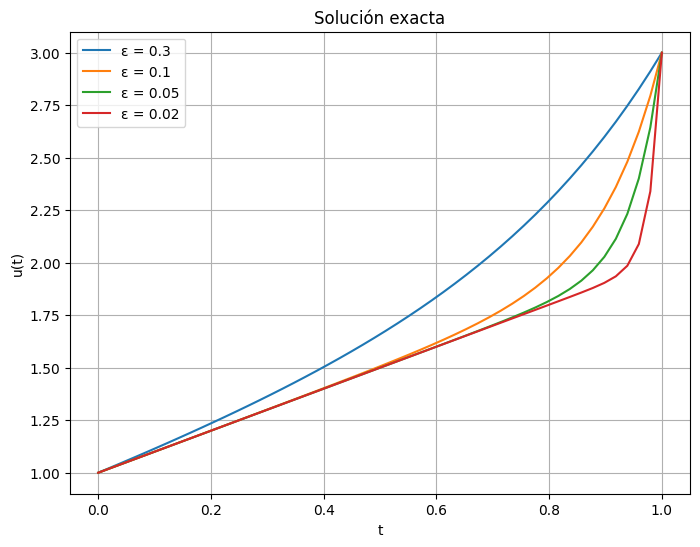

In [16]:
epsilons = [0.3, 0.1, 0.05, 0.02]

def exact_solution(t, epsilon):
    # Solución exacta:
    # u(t) = 1 + t + (e^(t/epsilon)-1)/(e^(1/epsilon)-1)
    return 1 + t + (np.exp(t / epsilon) - 1) / (np.exp(1 / epsilon) - 1)


# Parámetros
epsilon = 0.02
N = 50
t = np.linspace(0, 1, N)
u_exact = exact_solution(t, epsilon)

# Graficar ambas soluciones
plt.figure(figsize=(8, 6))
for epsilon in epsilons:
    u_exact = exact_solution(t, epsilon)
    plt.plot(t, u_exact, label=f"ε = {epsilon}")
plt.xlabel("t")
plt.ylabel("u(t)")
plt.title("Solución exacta")
plt.legend()
plt.grid(True)
plt.show()

In [17]:

def finite_diff_solution(epsilon, N):
    # Tamaño de paso
    h = 1.0 / N  # b-a / N
    # Nodos: t0, t1, ..., tN
    t = np.linspace(0, 1, N + 1)

    # Vector de incógnitas: u1, u2, ..., u_{N-1}
    # u0 y uN son conocidos (condiciones de contorno)
    n_unknowns = N - 1
    U = np.zeros(n_unknowns)  # para almacenar la solución

    # Matriz A y vector f, ambos de tamaño (N-1)
    A = np.zeros((n_unknowns, n_unknowns))
    f = np.full(n_unknowns, h**2)  # cada ecuación aporta h^2 en el lado derecho

    # Caso j = 1 (equivalente al nodo t1, índice 0 en U)
    # La ecuación: (-ε - h/2) u0 + (2ε) u1 + (-ε + h/2) u2 = h^2,
    # pero u0 se conoce: u0 = 1.
    A[0, 0] = 2 * epsilon
    if n_unknowns > 1:
        A[0, 1] = -epsilon + h / 2.0
    f[0] += (
        epsilon + h / 2.0
    ) * 1.0  # se traslada (-ε - h/2)*u0 al lado derecho, con u0 = 1
    A[-1, -1] = 2 * epsilon
    # Caso 1 < j < N-1 (nodos interiores puros, j=2,...,N-2)
    for i in range(1, n_unknowns - 1):
        # Para el nodo t_{i+1} (ya que i=0 corresponde a j=1, i=1 a j=2, etc.)
        A[i, i - 1] = -epsilon - h / 2.0  # coeficiente de u_{j-1}
        A[i, i] = 2 * epsilon  # coeficiente de u_j
        A[i, i + 1] = -epsilon + h / 2.0  # coeficiente de u_{j+1}
        # f[i] ya está en h^2

    # Caso j = N-1 (último nodo interior, corresponde a t_{N-1})
    if n_unknowns > 1:
        A[-1, -2] = -epsilon - h / 2.0  # coeficiente de u_{N-2}
        A[-1, -1] = 2 * epsilon  # coeficiente de u_{N-1}
        # u_N es conocido: u_N = 3, aparece en coeficiente: (-ε + h/2)*u_N
        f[-1] += (epsilon - h / 2.0) * 3.0

    # Resolvemos el sistema lineal: A U = f
    U = np.linalg.solve(A, f)

    # Construimos la solución completa, incluyendo condiciones de contorno:
    u_approx = np.concatenate(([1.0], U, [3.0]))

    return t, u_approx


def exact_solution(t, epsilon):
    # Solución exacta:
    # u(t) = 1 + t + (e^(t/epsilon)-1)/(e^(1/epsilon)-1)
    return 1 + t + (np.exp(t / epsilon) - 1) / (np.exp(1 / epsilon) - 1)

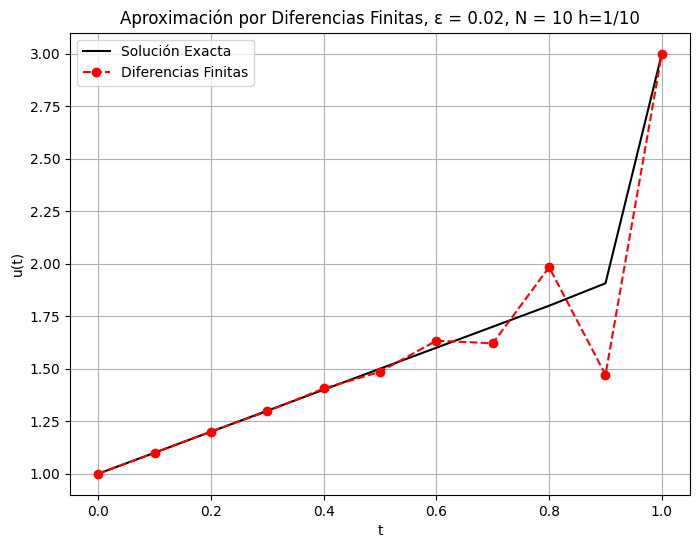

In [ ]:
# Parámetros
epsilon = 0.02
N = 10
t, u_approx = finite_diff_solution(epsilon, N)
u_exact = exact_solution(t, epsilon)

# Graficar ambas soluciones
plt.figure(figsize=(8, 6))
plt.plot(t, u_exact, "k-", label="Solución Exacta")
plt.plot(t, u_approx, "ro--", label="Diferencias Finitas")
plt.xlabel("t")
plt.ylabel("u(t)")
plt.title(f"Aproximación por Diferencias Finitas, ε = {epsilon}, N = {N} h=1/{N}")
plt.legend()
plt.grid(True)
plt.show()


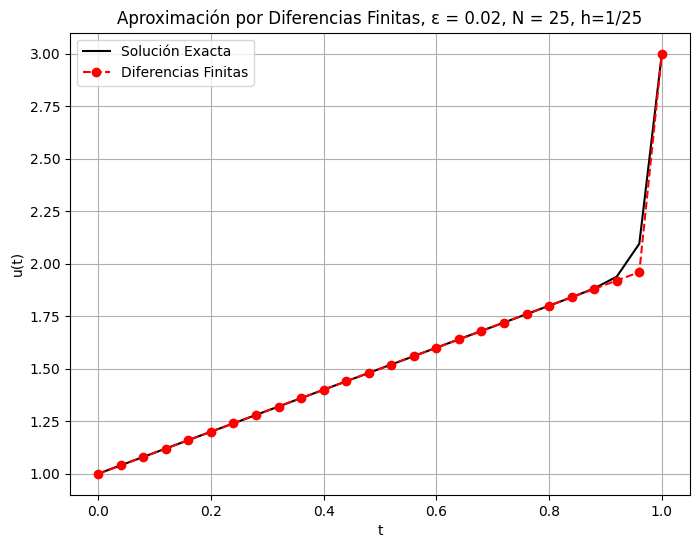

In [ ]:
t, u_approx = finite_diff_solution(epsilon, N)
u_exact = exact_solution(t, epsilon)

# Graficar ambas soluciones
plt.figure(figsize=(8, 6))
plt.plot(t, u_exact, "k-", label="Solución Exacta")
plt.plot(t, u_approx, "ro--", label="Diferencias Finitas")
plt.xlabel("t")
plt.ylabel("u(t)")
plt.title(f"Aproximación por Diferencias Finitas, ε = {epsilon}, N = {N}, h=1/{N}")
plt.legend()
plt.grid(True)
plt.show()


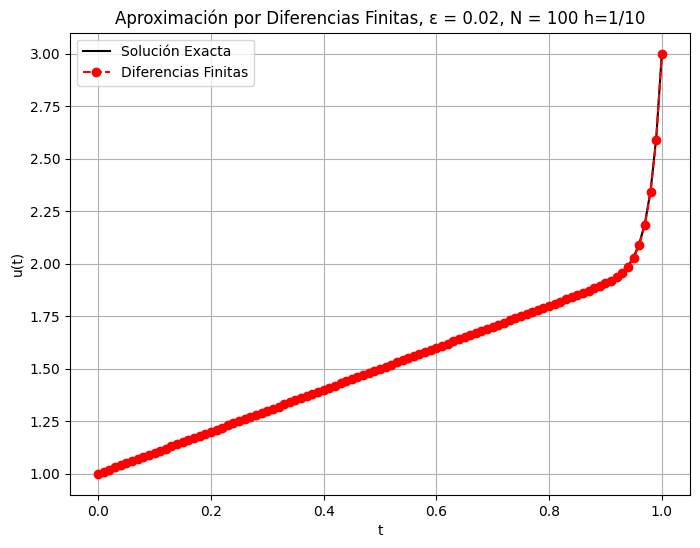

In [20]:
N = 100
t, u_approx = finite_diff_solution(epsilon, N)
u_exact = exact_solution(t, epsilon)

# Graficar ambas soluciones
plt.figure(figsize=(8, 6))
plt.plot(t, u_exact, "k-", label="Solución Exacta")
plt.plot(t, u_approx, "ro--", label="Diferencias Finitas")
plt.xlabel("t")
plt.ylabel("u(t)")
plt.title(f"Aproximación por Diferencias Finitas, ε = {epsilon}, N = {N} h=1/10")
plt.legend()
plt.grid(True)
plt.show()
